# **Kumpulan Data Rekomendasi buku**

## **Data Loading**

### **Download**

In [1]:
!pip install numpy==1.23.5 --force-reinstall
!pip install pandas==2.2.3 --force-reinstall
!pip install scikit-surprise
!pip install tensorflow==2.12.0

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-fores

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninsta

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-forests 

### **Import Library**

melakukan import pada beberapa libraries, seperti pandas, numpy, tenserflow, dll.

In [2]:
import pandas as pd
import numpy as np

from surprise import accuracy,SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt


Pada tahap ini, kita akan memilih file yang berbentuk csv yang akan diolah. Pada proyek ini kita hanya menggunakan file ```Books.csv``` dan ```Ratings.csv```. Langkah awal kita hubungankan colab ke drive kita dengan fungsi mount

In [3]:
#Menghubungkan colab ke drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


tahap selanjutnya yaitu memanggil dataset dari drive yang telah di hubungkan mengggunakan fungsi ```mount``` dengan mengistall ```gdown``` sebelum dilakukan pemanggilan

In [4]:
#install gdown
!pip install gdown


Tahap selanjutnya memasukan link yang di dalamnya berupa dataset yang telah di copy dari drive ke colab

In [5]:
#memasukan link dataset
import gdown
file_id = '10QXZ7pb1kcv8gfmgDz6jisc3BaunowBC'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, output='rekomendasi_buku.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10QXZ7pb1kcv8gfmgDz6jisc3BaunowBC
To: /content/rekomendasi_buku.zip
100%|██████████| 25.5M/25.5M [00:00<00:00, 39.1MB/s]


'rekomendasi_buku.zip'

setekah selesai di masukan langkah selanjutnya mengestrak file yang berupa zip

In [6]:
# Ekstrak file zip
import zipfile

with zipfile.ZipFile('rekomendasi_buku.zip', 'r') as zip_ref:
    zip_ref.extractall('rekomendasi_buku')


selanjutnya mengecek nama kelas yang telah di ekstrak

In [16]:
 # Cek nama kelas
import os

dataset_path = 'rekomendasi_buku'
class_names = os.listdir(dataset_path)
print("Kelas yang ditemukan:", class_names)

Kelas yang ditemukan: ['classicRec.png', 'Users.csv', 'DeepRec.png', 'Ratings.csv', 'Books.csv', 'recsys_taxonomy2.png']


Berdasarkan kelas yang di temukan pada dataset ini ada 6 kelas yaitu ```classicRec.png```, ```Users.csv```, ```DeepRec.png```, ```Ratings.csv```, ```Books.csv``` dan ```recsys_taxonomy2.png```.
Namun data kelas yang di perlukan pada projek system rekomendasi berupa file ```Books.csv``` dan ```Ratings```.

# **Exploratory Data Analysis (EDA)**

## **Data Understanding**

## **Gathering Data**

Pada projek ini, kita hanya akan menggunakan dataframe ```book```, ```rating``` dan ```users```. melihat jumlah masing-masing dataframe ketiganya

In [17]:
#melihat jumlah kolom dan baris dari masing-masing dataframe
books = pd.read_csv('rekomendasi_buku/Books.csv', low_memory=False)
ratings = pd.read_csv('rekomendasi_buku/Ratings.csv', low_memory=False)
print(books.shape)
print(ratings.shape)


(271360, 8)
(1149780, 3)


Berdasarkan dataset yang ditemukan informasi yaitu :

* Data book memiliki 8 kolom dan 271,360
* Data rating memiliki 3 kolom dan 1,149,780 Membuat dataframe baru untuk menggabungkan kedua dataset dengan nama mergee_df


menampilakan lima data paling atas dari ketiga dataset tersebut menggunakan fungsi ```head()```.

In [18]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Setelah menjalankan kode di atas, dapat dilihat bahwa pada dataset ```Books.csv ``` memiliki kolom:

* ISBN: Kode unik dari sebuah buku
* Book-Title: Judul buku
* Book-Author: Pengarang buku
* Year-Of-Publication: Tahun terbit buku
* Publisher: Penerbit buku
* Image-URL-S: Cover buku berukuran kecil
* Image-URL-M: Cover buku berukuran sedang
* Image-URL-L: Cover buku berukuran besar

In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Setelah menjalankan kode di atas, dapat dilihat bahwa dataset ```Ratings.csv``` memiliki kolom:

* User-ID: Kode unik dari pengguna yang memberikan penilaian
* ISBN: Kode unik dari sebuah buku
* Book-Rating: Penilaian buku nilai terendah dimulai dari angka 0

mengetahui informasi penting seperti tipe pada data

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Setelah mengeksekusi kode di atas, dapat dilihat bahwa seluruh kolom pada dataset ```Books.csv``` memiliki tipe yang berupa data *object*. Ada hal unik yang didapati ketika menjalankan kode di atas, dapat dilihat bahwa kolom ```Year-Of-Publication``` bertipe data object sedangkan tahun publikasi umumnya bertipe data ```integer```, oleh karena itu perlu adanya perbaikan pada tipe data.

### Mengubah Tipe Data

In [21]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Membuang value pada ```Year-Of-Publication``` ada yang bernilai ```DK Publishing Inc``` dan ```Gallimard```.

In [22]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Mengubah tipe data pada ```Year-Of-Publication``` dari ```object``` ke ```integer```.

In [23]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [24]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Setelah menjalankan kode di atas, dapat dilihat bahwa kolom User-ID dan Book-Rating pada dataset Ratings.csv memiliki tipe data integer sedangkan kolom ISBN bertipe object.

In [25]:
#menggabungkan ke dua data
mergee_df = pd.merge(ratings, books, on='ISBN')
mergee_df



,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031127,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031128,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031129,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031130,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


Setelah menjalankan kode di atas, dapat dilihat bahwa kolom User-ID dan Book-Rating pada dataset ```Ratings.csv``` memiliki tipe data ```integer ``` sedangkan kolom ISBN bertipe ```object```.

## Univariate Data Analysis

melakukan distribusi pada dataframe

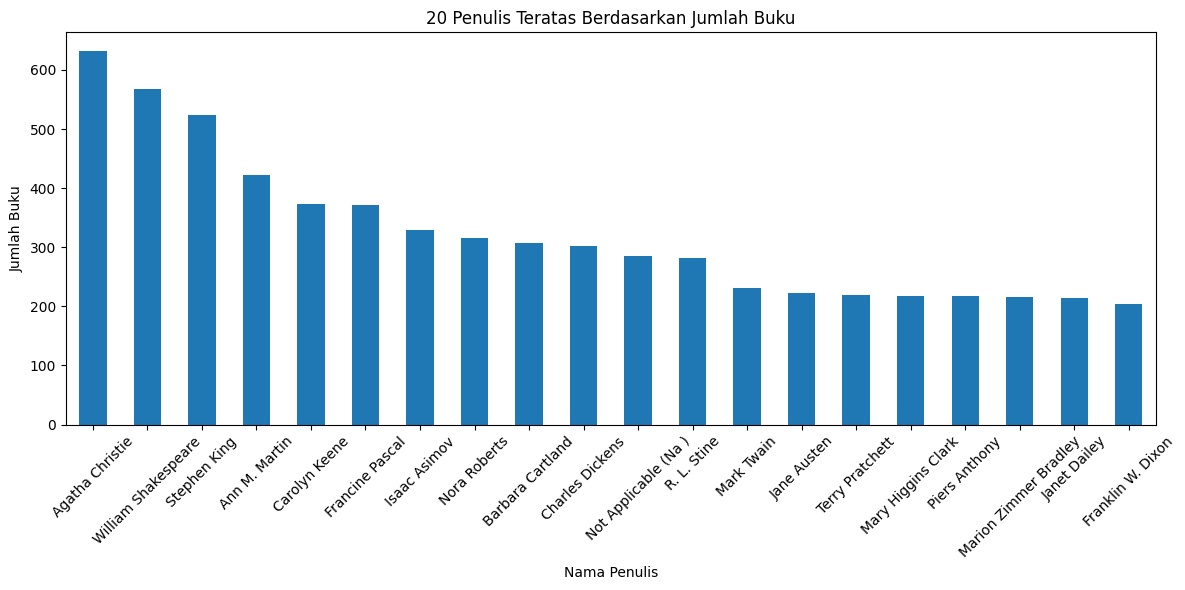

In [26]:
author_counts = books.groupby('Book-Author')['Book-Title'].count()
sorted_authors = author_counts.sort_values(ascending=False)
top_20_authors = sorted_authors.head(20)
plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('20 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Setelah menjalankan kode di atas dapat dilihat bahwa Penulis Agatha Christie menulis paling banyak buku yaitu sebanyak > 600 buku.

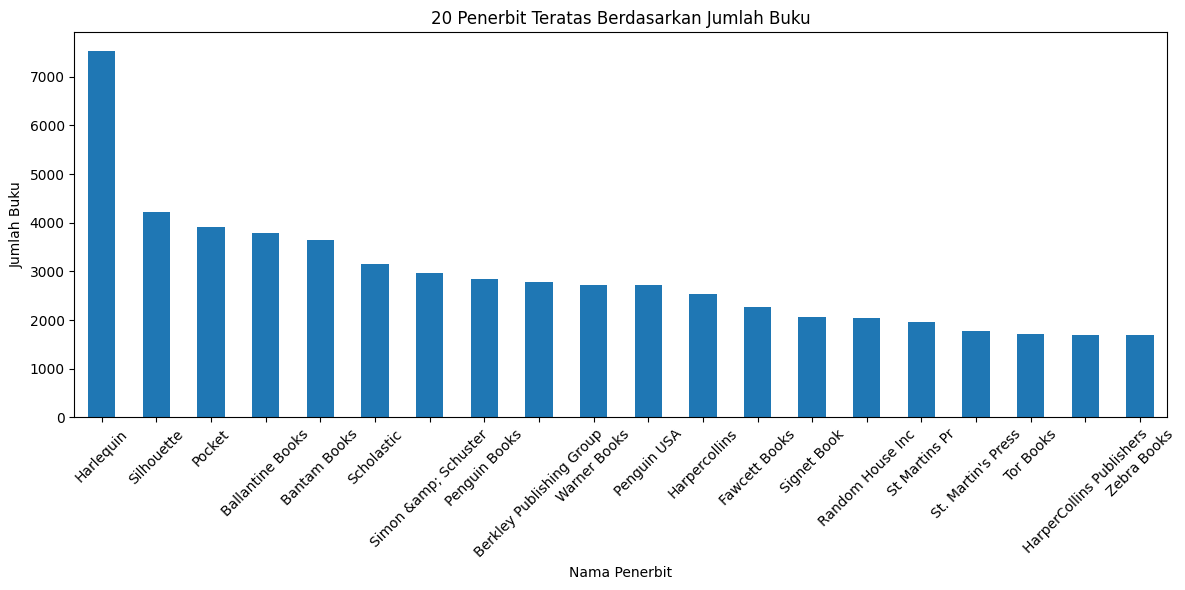

In [27]:
publisher_counts = books.groupby('Publisher')['Publisher'].count()
sorted_publisher = publisher_counts.sort_values(ascending=False)
top_20_publisher = sorted_publisher.head(20)
plt.figure(figsize=(12, 6))
top_20_publisher.plot(kind='bar')
plt.xlabel('Nama Penerbit')
plt.ylabel('Jumlah Buku')
plt.title('20 Penerbit Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Setelah menjalankan kode di atas dapat dilihat bahwa Penerbit Harlequin menerbitkan paling banyak buku yaitu sebanyak > 7000 buku.

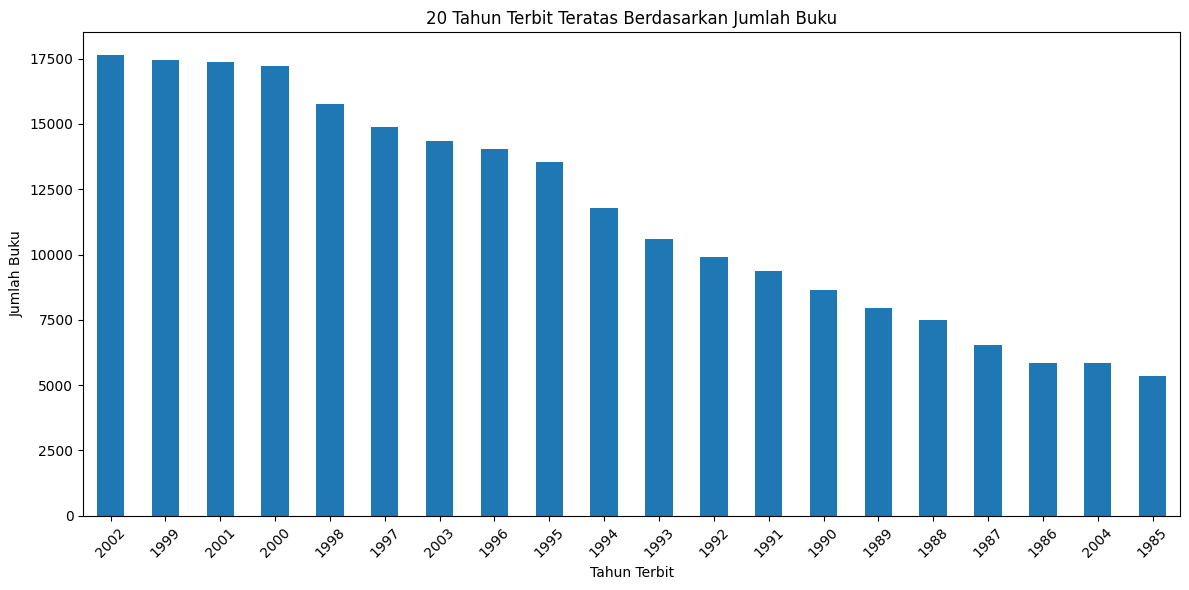

In [28]:
year_of_publication_counts = books.groupby('Year-Of-Publication')['Year-Of-Publication'].count()
sorted_year_of_publication = year_of_publication_counts.sort_values(ascending=False)
top_20_year_of_publication = sorted_year_of_publication.head(20)
plt.figure(figsize=(12, 6))
top_20_year_of_publication.plot(kind='bar')
plt.xlabel('Tahun Terbit')
plt.ylabel('Jumlah Buku')
plt.title('20 Tahun Terbit Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Setelah menjalankan kode di atas dapat dilihat bahwa Tahun Terbit paling banyak menerbitkan buku yaitu pada tahun 2002 sebesar > 17.500 buku.

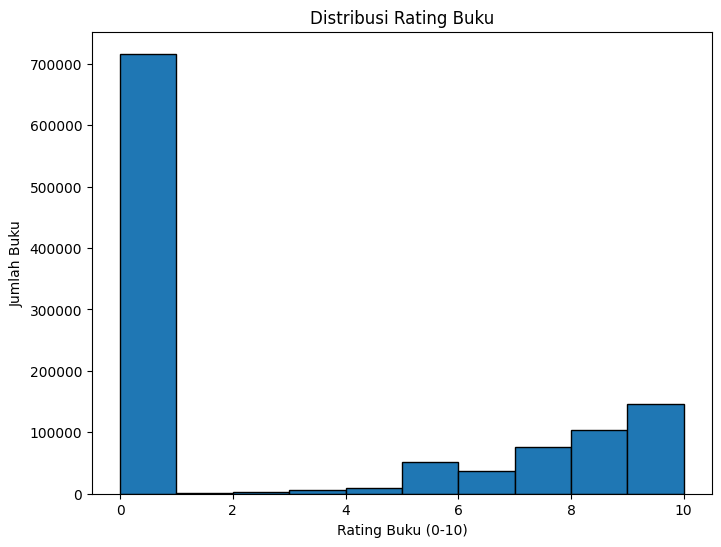

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(ratings['Book-Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating Buku (0-10)')
plt.ylabel('Jumlah Buku')
plt.title('Distribusi Rating Buku')
plt.show()

Setelah menjalankan kode di atas dapat dilihat bahwa rating buku sebagian besar mendapaptkan rating 0.

In [30]:
# Hitung rata-rata rating dari setiap judul buku
mean_rating_by_title = mergee_df.groupby('Book-Title')['Book-Rating'].mean()
top_20_titles = mean_rating_by_title.nlargest(20)
top_20_titles

,Book-Rating
Book-Title,
Dark Justice,10.0
'California Historical Landmarks',10.0
"'Isms: a dictionary of words ending in -ism, -ology, and -phobia,: With some similar terms, arranged in subject order",10.0
'Round the Corner (Sister Circle),10.0
006781: Bk.1 Gags De Boule Et Bil,10.0
"1,000 Makers of the Millennium: The Men and Women Who Have Shaped the Last 1,000 Years",10.0
"1,001 Computer Hints &amp; Tips: An A-To-Z Guide to Making the Most of Your Computer and the Internet",10.0
"1,001 Things Everyone Should Know About American History",10.0
"1,001 Ways to Save the Planet",10.0


Setelah menjalankan kode di atas dapat dilihat bahwa berikut merupakan 20 judul buku dengan rata-rata rating terbesar.

In [31]:
# Hitung rata-rata rating dari setiap judul buku
max_rating_by_title = mergee_df.groupby('Book-Title')['Book-Rating'].mean()
# Pilih 20 judul buku dengan rata-rata rating terkecil
top_20_titles = max_rating_by_title.nsmallest(20)
top_20_titles

,Book-Rating
Book-Title,
Always Have Popsicles,0.0
Apple Magic (The Collector's series),0.0
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.0
Deceived,0.0
Harry Potter and the Bible: The Menace Behind the Magick (And the Bible Series),0.0
Hiking the California Coastal Trail: Oregon to Monterey,0.0
It Takes Two,0.0
LA Gallinita Roja/the Little Red Hen,0.0


Setelah menjalankan kode di atas dapat dilihat bahwa berikut merupakan 20 judul buku dengan rata-rata rating terkecil.

# **Data Preparation**

Pada tahap Data Preparation dilakukan 2 langkah yaitu Penggabungan Data dan Hapus Variabel yang Tidak Digunakan

In [32]:
mergee_df = ratings.merge(books, on='ISBN')
mergee_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
9,276746,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...


# **Hapus Variabel Yang Tidak Digunakan**
Menghapus variabel-variabel yang tidak digunakan di pengembangan proyek dengan motode collaborative filtering yaitu

1. Image-URL-S
2. Image-URL-M
3. Image-URL-L
4. Book-Title
5. Book-Author
6. Year-Of-Publication
7. Publisher

In [33]:
from sys import breakpointhook
column_to_drop = ['Image-URL-S','Image-URL-M','Image-URL-L','Book-Title','Book-Author','Year-Of-Publication','Publisher']
book_rating_df = mergee_df.drop(column_to_drop, axis =1)
book_rating_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Data Preparation
Pada tahap ini akan dilakukan langkah-langkah sebagai berikut:

* Missing Value
* Encoding
* Skala Ulang Variabel Book-Rating
* Pembagian Data Uji dan Data Latih

### **Missing Value**

In [34]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [35]:
ratings.isnull().sum()


,0
User-ID,0
ISBN,0
Book-Rating,0


Tidak ditemukan missing value pada dataset





### **Encoding Data**

Dilakukan encoding ID untuk ISBN dan User-ID ke dalam indeks integer

In [36]:
user_ids = book_rating_df['User-ID'].unique().tolist()
user_encoded = {x: i for i, x in enumerate(user_ids)}
user_to_user_encoded = {i: x for i, x in enumerate(user_ids)}

book_ids = book_rating_df['ISBN'].unique().tolist()
book_encoded = {x: i for i, x in enumerate(book_ids)}
book_to_book_encoded = {i: x for i, x in enumerate(book_ids)}

print('Encoded user-id :', dict(list(user_encoded.items())[0: 10]))
print('Encoded book-id (isbn) :', dict(list(book_encoded.items())[0: 10]))

Encoded user-id : {276725: 0, 276726: 1, 276727: 2, 276729: 3, 276733: 4, 276744: 5, 276746: 6, 276747: 7, 276748: 8, 276751: 9}
Encoded book-id (isbn) : {'034545104X': 0, '0155061224': 1, '0446520802': 2, '052165615X': 3, '0521795028': 4, '2080674722': 5, '038550120X': 6, '0425115801': 7, '0449006522': 8, '0553561618': 9}


setelah itu memetakan data hasil encoding ke dataframe dengan menambahkan kolom baru yaitu kolom user_id dan isbn

In [37]:
book_rating_df['user_id'] = book_rating_df['User-ID'].map(user_encoded)
book_rating_df['isbn'] = book_rating_df['ISBN'].map(book_encoded)
book_rating_df.head()



,User-ID,ISBN,Book-Rating,user_id,isbn
0,276725,034545104X,0,0,0
1,276726,0155061224,5,1,1
2,276727,0446520802,0,2,2
3,276729,052165615X,3,3,3
4,276729,0521795028,6,3,4


### **Skala Ulang Variabel Book-Rating**
Dilakukan normalisai terhadap variabel Book-Rating yaitu merubah nilai rating menjadi nilai dengan batas skala 0 sampai 1 agar mudah dalam proses training

Mengubah nilai Book-Rating menjadi float

In [38]:
col_rating = 'Book-Rating'
book_rating_df[col_rating] = book_rating_df[col_rating].values.astype(np.float32)


Mengambil nilai min dan max Book-Rating



In [39]:
min_rating = min(book_rating_df[col_rating])
max_rating = max(book_rating_df[col_rating])

Menambahkan variabel baru di dataframe dengan nama rating



In [40]:
book_rating_df['rating'] = book_rating_df[col_rating].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
book_rating_df.head()


,User-ID,ISBN,Book-Rating,user_id,isbn,rating
0,276725,034545104X,0.0,0,0,0.0
1,276726,0155061224,5.0,1,1,0.5
2,276727,0446520802,0.0,2,2,0.0
3,276729,052165615X,3.0,3,3,0.3
4,276729,0521795028,6.0,3,4,0.6


### **Pembagian Data Latih dan Data Uji**
Membagi data menjadi data uji dan data latih dengan perbandingan 80% data latih dan 20% data uji.

Pembagian data uji dan data latih ini akan dilakukan dengan 2 cara yang berbeda. Hal ini dikarenakan untuk teknik SVD pembagian data uji dan data latih menggunakan modul ```train_test_split``` dari library suprise. Berikut masing-masing cara pembagian data uji dan lati.

* Pembagian data uji dan latih untuk teknik SVD

In [41]:


reader_svd = Reader(rating_scale=(0,1))
data_svd = Dataset.load_from_df(book_rating_df[['user_id', 'isbn', 'rating']], reader_svd)
trainset_svd, testset_svd = train_test_split(data_svd, test_size=0.2)

#Pembagian data uji dan latih untuk teknik Neural Network

x = book_rating_df[['user_id','isbn']].values
y = book_rating_df['rating'].values

n_train = 0.8
train_indices = int(n_train * book_rating_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[    0     0]
 [    1     1]
 [    2     2]
 ...
 [92103  6450]
 [92104 10387]
 [92105 65528]] [0.  0.5 0.  ... 0.  1.  1. ]


# **Modeling**

Dalam proyek ini, sistem rekomendasi dibangun menggunakan pendekatan collaborative filtering. Dua teknik yang diterapkan dalam pendekatan ini adalah:

* Collaborative filtering menggunakan metode Singular Value Decomposition (SVD)

* Collaborative filtering berbasis Neural Network

Untuk keperluan pengujian model, dibuatlah data uji berupa daftar buku yang belum pernah dibaca oleh pengguna berdasarkan User-ID yang dipilih.

In [42]:
test_user_id = 276729
read_books = ratings[ratings['User-ID'] == test_user_id]
unread_books =  ratings[~ratings['ISBN'].isin(read_books.ISBN.values)]['ISBN']


Singular Value Decomposition (SVD) adalah metode dari aljabar linear yang dimanfaatkan untuk mereduksi dimensi matriks. Melalui pendekatan ini, hubungan atau pola tersembunyi antar elemen dalam matriks dapat diidentifikasi.

In [43]:
svd = SVD()

svd.fit(trainset_svd)
df_svd_predict = unread_books.to_frame(name='ISBN')
df_svd_predict = df_svd_predict.merge(books[['ISBN','Book-Title','Book-Author']], left_on='ISBN', right_on='ISBN', how='left')
df_svd_predict['prediction_rate'] = unread_books.apply(lambda x: svd.predict(test_user_id, x).est)

n_top = 10
df_svd_predict.sort_values(by='prediction_rate',ascending=False).head(n_top)


,ISBN,Book-Title,Book-Author,prediction_rate
0,034545104X,Flesh Tones: A Novel,M. J. Rose,0.283867
766517,0671665871,GOING HOME,Danielle Steel,0.283867
766523,0671690582,WHISPER OF DEATH : WHISPER OF DEATH,Christopher Pike,0.283867
766522,0671690094,ANNE FRANK: DIARY OF A YOUNG GIRL,Anne Frank,0.283867
766521,067167630X,BOOMER,Charles Taylor,0.283867
766520,067167465X,BEST OF ENEMIES (NANCY DREW HARDY BOY SUPERMYS...,Carolyn Keene,0.283867
766519,0671673513,The SILENCE OF THE LAMBS,Thomas Harris,0.283867
766518,0671670662,WEB OF DREAMS (Casteel Saga (Paperback)),V.C. Andrews,0.283867
766516,0671664549,"Happy Birthday, Moon (Moonbear)",Frank Asch,0.283867
766525,0671692550,The Tale of Peter Rabbit (Sticker Book),Beatrix Potter,0.283867


### **Collaborative Filtering dengan Pendekatan Neural Network**
Pendekatan collaborative filtering berbasis Neural Network ini diadaptasi dari contoh pada situs Keras yang menggunakan kelas RecommenderNet.

Langkah awalnya adalah membuat kelas RecommenderNet yang diturunkan dari kelas Model milik Keras. Model ini dirancang untuk menghitung match score antara pengguna dan buku melalui operasi dot product. Nilai tersebut kemudian disesuaikan dengan menambahkan user bias dan book bias. Sebagai langkah akhir, skor yang diperoleh dinormalisasi ke dalam rentang 0 hingga 1 menggunakan fungsi aktivasi sigmoid.



In [44]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1)
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1])

    dot_user_resto = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_resto + user_bias + book_bias

    return tf.nn.sigmoid(x)


* Model dikembangkan dengan menggunakan fungsi kehilangan (loss function) Binary Crossentropy, yang sesuai untuk memodelkan output dalam bentuk probabilitas. Untuk proses optimisasi, digunakan algoritma Adam (Adaptive Moment Estimation) yang dikenal efisien dalam menangani data berdimensi besar dan pelatihan yang kompleks. Sebagai metrik evaluasi, digunakan Root Mean Square Error (RMSE) untuk mengukur seberapa besar selisih antara prediksi dan nilai sebenarnya.

* Hasil prediksi model teknik Neural Network untuk 10 buku yang disarankan

In [45]:
embedding_size = 50
num_users = len(book_rating_df['user_id'])
num_books = len(book_rating_df['isbn'])

model_nn = RecommenderNet(num_users, num_books, embedding_size)
model_nn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

unread_isbns = list(set(unread_books).intersection(set(book_encoded.keys())))
unread_isbns_encode = [[(book_encoded.get(x))] for x in unread_isbns]

user_encoder = user_encoded.get(test_user_id)
user_book_array =  np.hstack(([[user_encoder]] * len(unread_isbns_encode), unread_isbns_encode))

pred_ratings = model_nn.predict(user_book_array).flatten()


8443/8443 [==============================] - 21s 2ms/step


In [46]:
op_ratings_indices = pred_ratings.argsort()[-n_top:][::-1]
recommended_book_isbns = [book_to_book_encoded.get(unread_isbns_encode[x][0]) for x in op_ratings_indices]
df_nn_predict = books[books['ISBN'].isin(recommended_book_isbns)]
df_nn_predict[['ISBN','Book-Title','Book-Author']]

,ISBN,Book-Title,Book-Author
47213,0373764359,"His Majesty, M.D. (Man Of The Month/The Royal ...",Leanne Banks
57191,0373246005,Where You Least Expect It (Silhouette Special ...,Tori Carrington
57639,0140048103,A Square of Sky and a Touch of Earth,Janina David
105002,0789459698,Essential Managers: Managing Budgets,Stephen Brookson
189894,0586061657,The Panther Book of Scottish Short Stories,James Campbell
196622,1558749527,Perfect Daughters (Revised Edition),Robert J. Ackerman
207403,0380778491,A Question of Innocence,Brandilyn Collins
218071,1878624393,There's an Elephant in the Bathtub (Storytime ...,Jo Albee
240999,0465039138,Code and Other Laws of Cyberspace,Lawrence Lessig
259193,0821730533,Delightful Deception (Regency),Nancy Lawrence


# **Evaluation**
Evaluasi model menggunakan metriks RMSE (Root Mean Square Error)

In [47]:
rmse = pd.DataFrame(columns=['test'], index=['SVD','NeuralNetwork'])

Evaluasi model SVD dilakukan menggunakan modul accuracy dari library Surprise untuk mengukur performa prediksi terhadap data uji.

In [48]:
predictions = svd.test(testset_svd)
rmse.loc['SVD','test'] = accuracy.rmse(predictions)

RMSE: 0.3437


Evaluasi collaborative filtering untuk teknik Neural Network



In [49]:
history = model_nn.fit(
    x = x_train,
    y = y_train,
    batch_size = 500,
    epochs = 4,
    validation_data = (x_val, y_val)
)

Epoch 1/4
1650/1650 [==============================] - 4289s 3s/step - loss: 0.5911 - root_mean_squared_error: 0.3804 - val_loss: 0.6967 - val_root_mean_squared_error: 0.4444
Epoch 2/4
1650/1650 [==============================] - 4182s 3s/step - loss: 0.5872 - root_mean_squared_error: 0.3715 - val_loss: 0.7088 - val_root_mean_squared_error: 0.4429
Epoch 3/4
1650/1650 [==============================] - 4208s 3s/step - loss: 0.6983 - root_mean_squared_error: 0.4100 - val_loss: 0.7195 - val_root_mean_squared_error: 0.4413
Epoch 4/4
1650/1650 [==============================] - 4221s 3s/step - loss: 0.8395 - root_mean_squared_error: 0.4425 - val_loss: 0.7278 - val_root_mean_squared_error: 0.4393


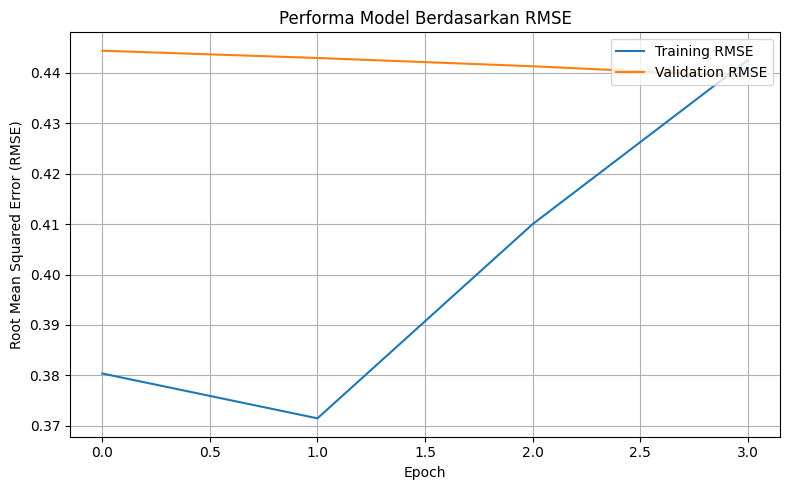

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Performa Model Berdasarkan RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
rmse.loc['NeuralNetwork','test'] = history.history['val_root_mean_squared_error'][-1]
rmse


,test
SVD,0.343696
NeuralNetwork,0.439319


Dilihat dari tabel di atas, terlihat bahwa nilai RMSE dari teknik Neural Network lebih besar dibandingkan dengan teknik SVD. Meskipun selisihnya tidak terlalu signifikan, hasil ini menunjukkan bahwa performa model Neural Network masih dapat ditingkatkan lebih lanjut dengan melakukan tuning hyperparameter yang lebih optimal, seperti penyesuaian jumlah neuron, learning rate, dan jumlah epoch.

Oleh karena itu, meskipun saat ini teknik SVD menunjukkan hasil yang lebih akurat, teknik Neural Network tetap dipilih sebagai algoritma sistem rekomendasi buku dalam proyek ini, karena memiliki potensi yang lebih besar untuk dikembangkan dan ditingkatkan kinerjanya ke depannya.











### **Conclusion**
Sistem rekomendasi buku telah berhasil dikembangkan menggunakan metode collaborative filtering dengan pendekatan Neural Network. Teknik ini dipilih berdasarkan nilai RMSE yang relatif kecil dan potensi pengembangan lebih lanjut.

Meskipun hasil yang diperoleh sudah cukup baik, proyek ini masih memiliki ruang untuk perbaikan, khususnya pada aspek kualitas dataset serta penyesuaian hyperparameter pada model Neural Network agar performa sistem rekomendasi dapat lebih ditingkatkan di masa mendatang.